In [26]:
import pandas as pd

In [27]:
df = pd.read_parquet("data/df_wiki_data.parquet")

In [32]:
type(df["Target_QC_aggcat"][0])

str

In [3]:
df = df[['spectral_embedding_1', 'Target_QC_aggcat']]

In [10]:
res = df[df["spectral_embedding_1"] > -5.134e-12]
res = res[res["spectral_embedding_1"] < 2.928e-11]

In [11]:
res.Target_QC_aggcat.value_counts()

Target_QC_aggcat
0    263764
1    107800
2      1841
Name: count, dtype: int64

***

In [20]:
import graph_tool.all as gt
import matplotlib.pyplot as plt
from graph_tool.all import GraphView, graph_draw, prop_to_size

In [10]:
G_Wiki = gt.load_graph("data/G_wiki.gt")

In [ ]:
Wiki_metrics = {
    "reciprocity" : gt.edge_reciprocity(G_Wiki),
    "density" : gt.edge_density(G_Wiki),
    "global_clustering" : gt.global_clustering(G_Wiki)[0],
    "assortativity_degree" : gt.assortativity(G_Wiki,"total")[0],
    "assortativity_QC_aggcat" : gt.assortativity(G_Wiki, G_Wiki.vp["Target_QC_cat"])[0],
    "assortativity_QC_numlog" : gt.scalar_assortativity(G_Wiki, G_Wiki.vp["Target_QC_numlog"])[0],
}

0.46767909071036656

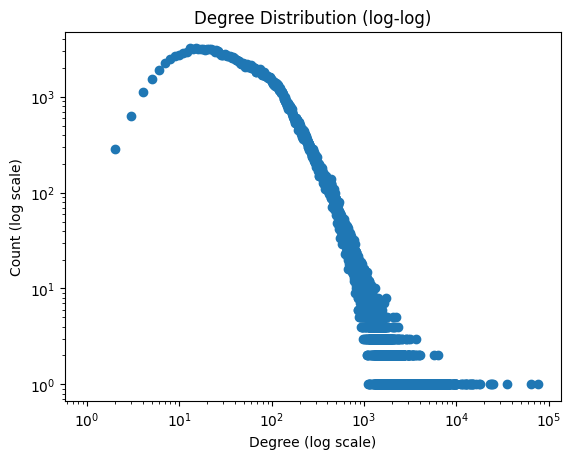

In [21]:
import numpy as np
# Get degree counts
hist = gt.vertex_hist(G_Wiki, "total")

# Plot on log-log scale
plt.loglog(hist[1][:-1], hist[0], 'o')
plt.title("Degree Distribution (log-log)")
plt.xlabel("Degree (log scale)")
plt.ylabel("Count (log scale)")
plt.show()